In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_gene = pd.read_csv("~/nSimplices/data/sce_full_Darmanis_scScope.csv", index_col=0, header=0)
print(df_gene.shape)

(420, 17206)


In [3]:
df_array = np.array(df_gene)
gene_meds = np.median(df_array, axis=0)
genes = df_gene.columns.values
gene_meds.shape

(17206,)

In [4]:
zipped = zip(gene_meds, genes)
    
# Sort the zipped array based on the values in the first array
sorted_zipped = sorted(zipped, key=lambda x: x[0], reverse=True)

# Unzip the sorted array
sorted_gene_meds, sorted_genes = zip(*sorted_zipped)

med_counts_dict = {}
for gene, med in zip(sorted_genes, sorted_gene_meds):
    med_counts_dict[gene] = med

In [5]:
top_genes = sorted_genes[:500]

In [19]:
def is_90_percent_greater(lst, value):
    # Count the number of elements greater than the value
    count_greater = sum(1 for element in lst if element > value)
    
    # Calculate the percentage
    percentage = (count_greater / len(lst)) * 100
    
    # Check if the percentage is greater than or equal to 90%
    return (percentage >= 80)
    

In [20]:
outlier_indices = [ 90,  91,  94, 102, 103, 108, 114, 145, 148, 160, 200, 205, 206, 208, 209, 214, 217, 220,
 226, 231, 239, 245, 249, 250, 251, 252, 284, 295, 297, 321, 323, 325, 329, 330, 332, 339,
 353, 355, 397, 401, 404, 407, 411, 413]

In [21]:
box_plot_dict = {}
top_greater_genes = []
for gene in top_genes:
    outlier_counts = list(df_gene.iloc[outlier_indices][gene])
    # print(len(counts), counts, med_counts_dict[gene])
    if is_90_percent_greater(outlier_counts, med_counts_dict[gene]):
        counts =  list(df_gene[gene])
        box_plot_dict[gene] = counts
        top_greater_genes.append(gene)


In [22]:
top_greater_genes

['MALAT1',
 'DPYSL2',
 'CALM2',
 'PCDH9',
 'CAPZA1',
 'SEPT7',
 'NFIA',
 'KIF1B',
 'SYT11',
 'TMBIM6',
 'QKI',
 'GPM6B',
 'GABARAP',
 'GLUL',
 'FMNL2',
 'B2M',
 'MYO6']

In [23]:


# outlier_indices = [94, 114, 148, 200, 205, 206, 208, 209, 214, 220, 226, 239, 245, 250, 252, 284, 295, 321,
#  323, 329, 332, 339, 355, 397, 401, 404, 407, 411]

outlier_x = []
outlier_y = []
for index in outlier_indices:
    for gene in top_greater_genes:
        gene_index = top_greater_genes.index(gene)+1
        outlier_x.append(gene_index)
        outlier_gene_count = df_gene.iloc[index][gene]
        outlier_y.append(outlier_gene_count)


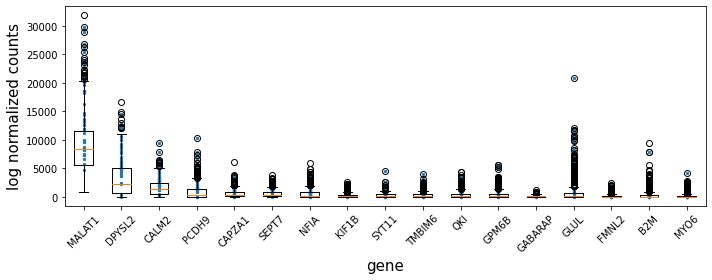

In [33]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(10)
label_size = 15
ax.boxplot(box_plot_dict.values())
ax.set_xticklabels(box_plot_dict.keys())
plt.scatter(x=outlier_x, y=outlier_y, s=5)
ax.tick_params(axis='x', rotation=45)
plt.xlabel("gene", fontsize=label_size)
plt.xticks(fontsize=10)
plt.ylabel("log normalized counts", fontsize=label_size)
plt.yticks(fontsize=10)
plt.tight_layout()
figpath = "../outputs/Darmanis_box_plot.pdf"
plt.savefig(figpath)
plt.show()

